Подключение необходимых библиотек 

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

Изучение содержимого датасета

In [3]:
data = pd.read_csv('D:\\BSU\\OOD\\df_file.csv')
print("Размер датасета: ", data.shape)  
print("Типы данных:\n", data.dtypes)  
print("Количество пропущенных значений:\n", data.isnull().sum())

Размер датасета:  (2225, 2)
Типы данных:
 Text     object
Label     int64
dtype: object
Количество пропущенных значений:
 Text     0
Label    0
dtype: int64


Подготовка данных

In [4]:
data['Text'] = data['Text'].str.lower().str.strip()
data['Text'] = data['Text'].apply(lambda x: re.sub(r'[^a-zA-Zа-яА-Я\s]', '', x))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Label'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Метод опорных векторов

In [7]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_tfidf, y_train)
y_pred = svm_model.predict(X_test_tfidf)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9797752808988764
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        92
           1       1.00      1.00      1.00        98
           2       0.97      0.99      0.98        77
           3       0.97      0.99      0.98        76
           4       0.97      0.97      0.97       102

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445



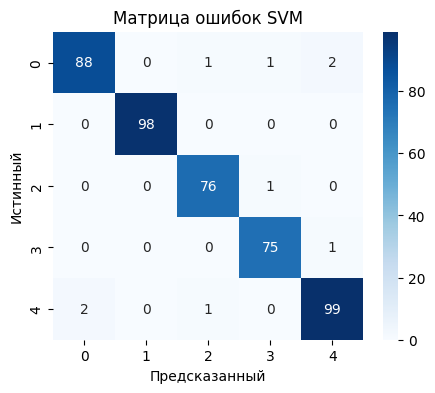

In [9]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Предсказанный')
plt.ylabel('Истинный')
plt.title('Матрица ошибок SVM')
plt.show()

Нейроные сети прямого распространения

In [10]:
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 20), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train_tfidf, y_train)
y_pred_mlp = mlp_model.predict(X_test_tfidf)

In [11]:
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

MLP Accuracy: 0.9775280898876404
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        92
           1       0.99      1.00      0.99        98
           2       0.97      0.97      0.97        77
           3       0.95      1.00      0.97        76
           4       0.98      0.97      0.98       102

    accuracy                           0.98       445
   macro avg       0.98      0.98      0.98       445
weighted avg       0.98      0.98      0.98       445



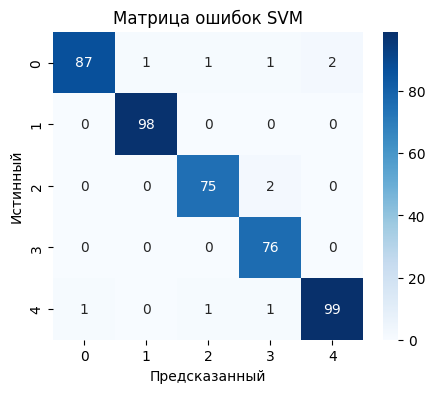

In [12]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Предсказанный')
plt.ylabel('Истинный')
plt.title('Матрица ошибок SVM')
plt.show()